In [1]:
import json

In [2]:
import matplotlib.pyplot as plt

In [3]:
json_path = "/data/home/dz/checkpoint_log/SlowFast_output/MViT2_S_Diving48/json_stats.log"

In [4]:
train_data = []
val_data = []

In [5]:
with open(json_path) as f:
    for line in f:
        try:
            # line: 
            # 'json_stats: {"RAM": "11.46/62.52G", "_type": "val_epoch", "epoch": "240/240", "gpu_mem": "6.47G", 
            # "min_top1_err": 45.73604, "min_top5_err": 9.84772, "time_diff": 0.64361, "top1_err": 45.73604, "top5_err": 9.84772}\n'
            json_obj_str = line.split("s: ")[1]
            data = json.loads(json_obj_str)
            # 现在可以使用data字典来访问每个JSON对象：
            if(data["_type"]=="train_epoch"):
                train_data.append(data)
            else:
                val_data.append(data)
        except json.JSONDecodeError:
            # 如果解码错误，可以选择忽略该行或采取其他操作。
            print(line)
            pass

In [10]:
Train_epoch = []
Train_loss = []
Train_top1_err = []
Train_top5_err = []

In [11]:
for data in train_data:
    Train_epoch.append(int(data["epoch"].split('/')[0]) - 200)
    Train_loss.append(float(data["loss"]))
    Train_top1_err.append(float(data["top1_err"]))
    Train_top5_err.append(float(data["top5_err"]))

In [8]:
# Train_epoch,Train_loss,Train_top1_err,Train_top5_err

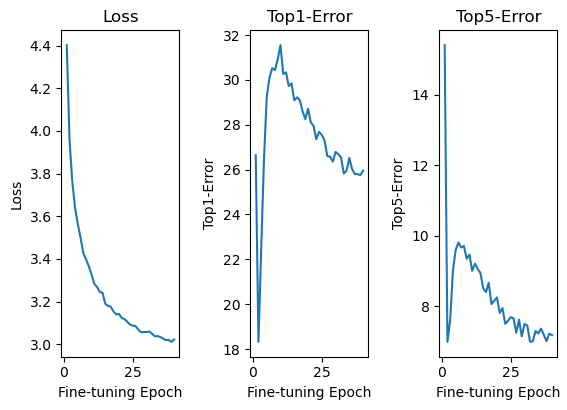

In [16]:
plt.subplot(1, 3, 1)
plt.plot(Train_epoch, Train_loss)
plt.title('Loss')
plt.xlabel('Fine-tuning Epoch')
plt.ylabel('Loss')

# 绘制第二个子图
plt.subplot(1, 3, 2)
plt.plot(Train_epoch, Train_top1_err)
plt.title('Top1-Error')
plt.xlabel('Fine-tuning Epoch')
plt.ylabel('Top1-Error')

# 绘制第三个子图
plt.subplot(1, 3, 3)
plt.plot(Train_epoch, Train_top5_err)
plt.title('Top5-Error')
plt.xlabel('Fine-tuning Epoch')
plt.ylabel('Top5-Error')

# 调整子图之间的间距和位置
plt.subplots_adjust(wspace=0.6, bottom=0.2)

# 显示图形
plt.show()

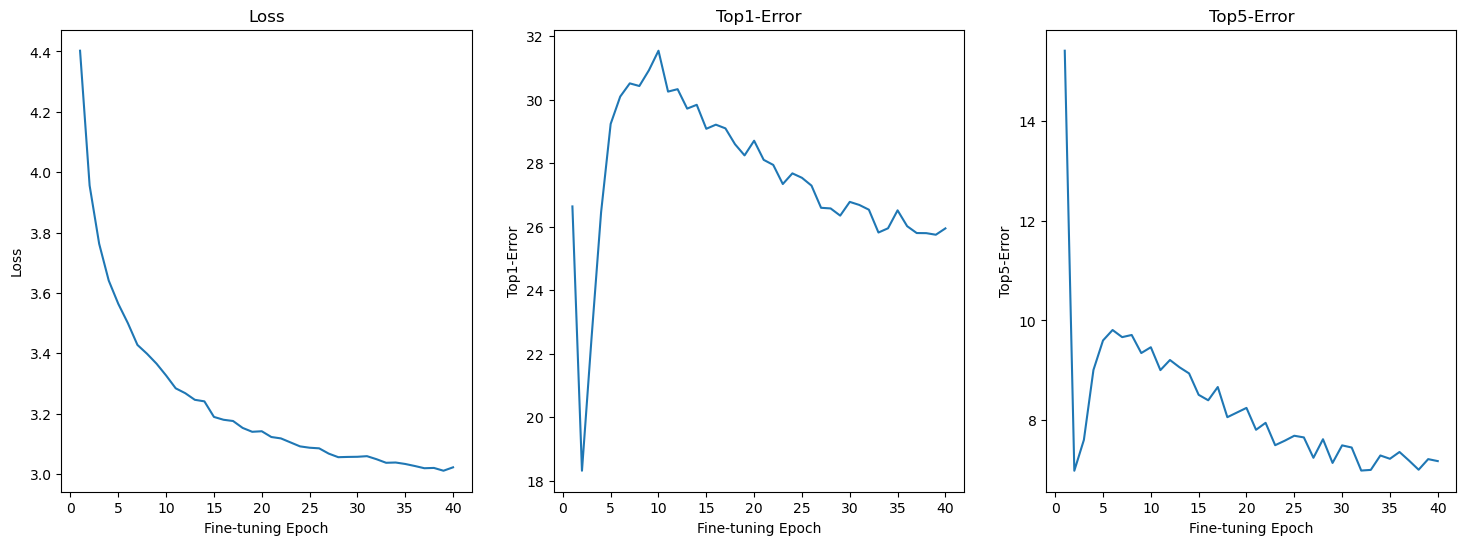

In [20]:
# 创建一个 2x2 大小的图形对象，并设置其大小
fig = plt.figure(figsize=(18, 6))

# 向图形对象添加第一个子图，并绘制一个正弦曲线
ax1 = fig.add_subplot(1, 3, 1)
x = Train_epoch
y = Train_loss
ax1.plot(x, y)
ax1.set_xlabel('Fine-tuning Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Loss')

# 向图形对象添加第二个子图，并绘制一个余弦曲线
ax2 = fig.add_subplot(1, 3, 2)
x = Train_epoch
y = Train_top1_err
ax2.plot(x, y)
ax2.set_xlabel('Fine-tuning Epoch')
ax2.set_ylabel('Top1-Error')
ax2.set_title('Top1-Error')

# 向图形对象添加第三个子图，并绘制一个正切曲线
ax3 = fig.add_subplot(1, 3, 3)
x = Train_epoch
y = Train_top5_err
ax3.plot(x, y)
ax3.set_xlabel('Fine-tuning Epoch')
ax3.set_ylabel('Top5-Error')
ax3.set_title('Top5-Error')

# 展示图形
plt.show()

In [21]:
Val_epoch = []
Val_top1_err = []
Val_top5_err = []

In [23]:
for data in val_data:
    Val_epoch.append(int(data["epoch"].split('/')[0]) - 200)
    Val_top1_err.append(float(data["min_top1_err"]))
    Val_top5_err.append(float(data["min_top5_err"]))

In [ ]:
# 创建一个 2x2 大小的图形对象，并设置其大小
fig = plt.figure(figsize=(12, 6))

# 向图形对象添加第一个子图，并绘制一个正弦曲线
ax1 = fig.add_subplot(1, 3, 1)
x = Val_epoch
y = Val_top1_err
ax1.plot(x, y)
ax1.set_xlabel('Val Epoch')
ax1.set_ylabel('Min Top1-Error')
ax1.set_title('Min Top1-Error')

# 向图形对象添加第二个子图，并绘制一个余弦曲线
ax2 = fig.add_subplot(1, 3, 2)
x = Val_epoch
y = Val_top5_err
ax2.plot(x, y)
ax2.set_xlabel('Val Epoch')
ax2.set_ylabel('Min Top5-Error')
ax2.set_title('Min Top5-Error')

# 展示图形
plt.show()